In [ ]:
import pandas as pd
df = pd.read_excel('/content/ML Assignment Dataset.xlsx', sheet_name='Train')

In [ ]:
df.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


Step 1: Exploratory Data Analysis (EDA) to identify patterns and observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2   

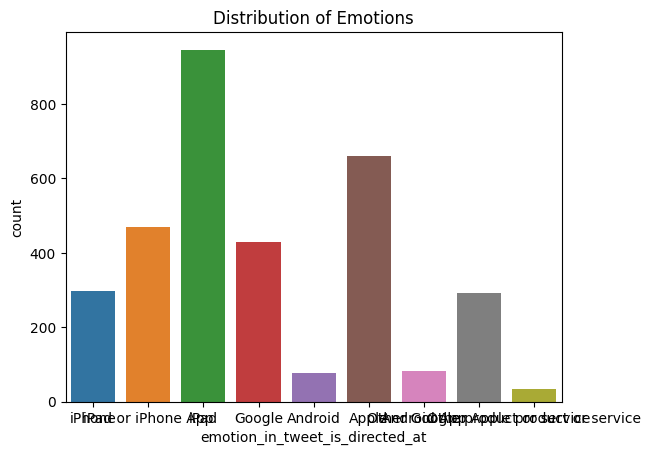

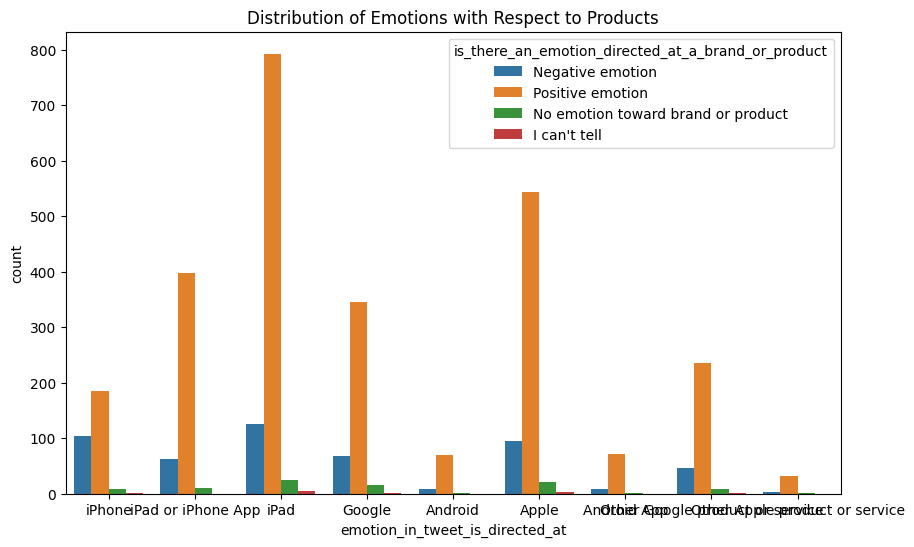

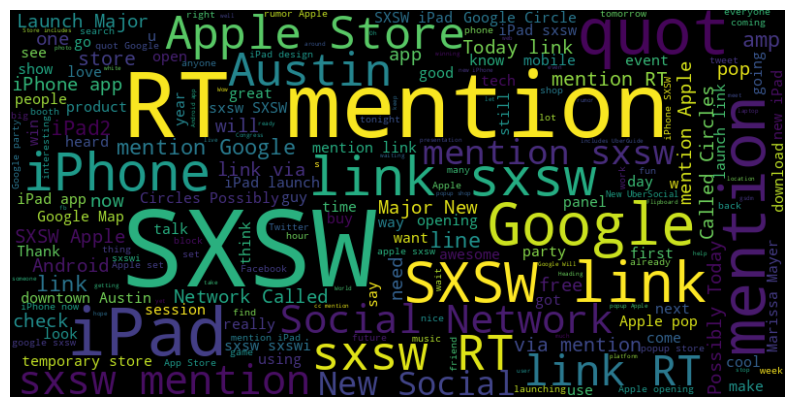

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.info()

print(df.head())

# statistics
print(df.describe())

print(df.isnull().sum())

# distribution of emotions
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.title('Distribution of Emotions')
plt.show()

# distribution of emotions with respect to products
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Distribution of Emotions with Respect to Products')
plt.show()

# Word cloud for tweet_text
from wordcloud import WordCloud

# Combine all tweet_text into a single string
all_text = ' '.join(df['tweet_text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 8584
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          3291 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  3291 non-null   object
dtypes: object(3)
memory usage: 102.8+ KB


We can use some models like(TextBlob, NLTK, spaCy, Hugging Face Transformers ) to find out emotion and extract brand the emotion is conveyed at.

Step 3: Augment the dataset and fine-tune a pre-trained transformer model for emotion and product prediction.

In [ ]:
# bert-base-uncased bert-base-multilingual-cased roberta-base distilbert-base-uncased gpt-2 xlnet-base-cased albert-base-v2 t5-base

In [10]:
pip install transformers torch

In [11]:
pip install tensorflow

In [12]:
pip install transformers scikit-learn

In [13]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tenso

In [ ]:
unique_values = df["is_there_an_emotion_directed_at_a_brand_or_product"].unique()
unique_values

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [ ]:
# Trim the DataFrame to 500 rows
df = df.head(500)

In [ ]:
df.info()

print(df.head())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 1250
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          500 non-null    object
 1   emotion_in_tweet_is_directed_at                     500 non-null    object
 2   is_there_an_emotion_directed_at_a_brand_or_product  500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2     

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# data = {
#     'tweet_text': [".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",
#                    "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
#                    "@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.",
#                    "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw"],
#     'emotion_in_tweet_is_directed_at': ['iPhone', 'iPad or iPhone App', 'iPad', 'iPad or iPhone App'],
#     'is_there_an_emotion_directed_at_a_brand_or_product': ['Negative emotion', 'Positive emotion', 'Positive emotion', 'Negative emotion']
# }

# df = pd.DataFrame(data)

train_texts, val_texts, train_labels, val_labels = train_test_split(df['tweet_text'].values, df['is_there_an_emotion_directed_at_a_brand_or_product'].values, test_size=0.2, random_state=42)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load model
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Tokenize input text and pad sequences
max_length = 128  # maximum sequence length
input_ids = []
attention_masks = []

for text in train_texts:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Tokenize and pad the validation set
val_input_ids = []
val_attention_masks = []

for text in val_texts:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    val_input_ids.append(encoded_dict['input_ids'])
    val_attention_masks.append(encoded_dict['attention_mask'])

val_input_ids = tf.concat(val_input_ids, axis=0)
val_attention_masks = tf.concat(val_attention_masks, axis=0)

# Encode labels
label_mapping = {'Negative emotion': 0, 'Positive emotion': 1, 'No emotion toward brand or product': 2}
df['label'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(label_mapping)

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['tweet_text'].values, df['label'].values, test_size=0.2, random_state=42)

# Build the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_mapping))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit([input_ids, attention_masks], train_labels, epochs=3, batch_size=32,
          validation_data=([val_input_ids, val_attention_masks], val_labels))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
13/13 [==============================] - 735s 52s/step - loss: 0.8578 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.8000
Epoch 2/3
13/13 [==============================] - 698s 54s/step - loss: 0.5587 - accuracy: 0.8225 - val_loss: 0.5770 - val_accuracy: 0.8000
Epoch 3/3
13/13 [==============================] - 656s 51s/step - loss: 0.5249 - accuracy: 0.8225 - val_loss: 0.5506 - val_accuracy: 0.8000


In [ ]:
# New tweets for test/validation
new_tweets = [
    "#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",
    "Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB"
]

# Tokenize and pad the new tweets
new_input_ids = []
new_attention_masks = []

for text in new_tweets:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    new_input_ids.append(encoded_dict['input_ids'])
    new_attention_masks.append(encoded_dict['attention_mask'])

new_input_ids = tf.concat(new_input_ids, axis=0)
new_attention_masks = tf.concat(new_attention_masks, axis=0)

# Make predictions
predictions = model.predict([new_input_ids, new_attention_masks])

# Convert logits to probabilities
probabilities = tf.nn.softmax(predictions.logits, axis=-1)

# Get predicted labels
predicted_labels = tf.argmax(probabilities, axis=-1).numpy()

# Map predicted labels back to emotions
label_mapping_inverse = {v: k for k, v in label_mapping.items()}

predicted_emotions = [label_mapping_inverse[label] for label in predicted_labels]

# Display results
for tweet, emotion in zip(new_tweets, predicted_emotions):
    print(f"Tweet: {tweet}")
    print(f"Predicted Emotion: {emotion}")
    print()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 5s 5s/step
Tweet: #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan
Predicted Emotion: Positive emotion

Tweet: Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB
Predicted Emotion: Positive emotion



In [ ]:
# Evaluate the model on the validation set
eval_results = model.evaluate([val_input_ids, val_attention_masks], val_labels, batch_size=32)

# Print evaluation results
print(f"Loss: {eval_results[0]}")
print(f"Accuracy: {eval_results[1]}")

4/4 [==============================] - 73s 16s/step - loss: 0.5506 - accuracy: 0.8000
Loss: 0.5505620837211609
Accuracy: 0.800000011920929


In [ ]:
import os

# Save the fine-tuned model
save_path = 'fine_tuned_bert_sentiment_model'
model.save_pretrained(save_path)

# Save the tokenizer
tokenizer.save_pretrained(save_path)

print(f"Model and tokenizer saved to {save_path}")

Model and tokenizer saved to fine_tuned_bert_sentiment_model


In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load the model and tokenizer
loaded_model = TFBertForSequenceClassification.from_pretrained('fine_tuned_bert_sentiment_model')
loaded_tokenizer = BertTokenizer.from_pretrained('fine_tuned_bert_sentiment_model')

Some layers from the model checkpoint at fine_tuned_bert_sentiment_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at fine_tuned_bert_sentiment_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
val_predictions = model.predict([val_input_ids, val_attention_masks])
val_predictions_labels = tf.argmax(tf.nn.softmax(val_predictions.logits, axis=-1), axis=-1).numpy()

# Confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(val_labels, val_predictions_labels, target_names=label_mapping.keys())
print("Classification Report:")
print(class_report)

4/4 [==============================] - 62s 16s/step
Confusion Matrix:
[[ 0 18  0]
 [ 0 80  0]
 [ 0  2  0]]
Classification Report:
                                    precision    recall  f1-score   support

                  Negative emotion       0.00      0.00      0.00        18
                  Positive emotion       0.80      1.00      0.89        80
No emotion toward brand or product       0.00      0.00      0.00         2

                          accuracy                           0.80       100
                         macro avg       0.27      0.33      0.30       100
                      weighted avg       0.64      0.80      0.71       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# emotion_predicted_towards prediction

In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00


In [15]:
pip install accelerate>=0.20.1

In [16]:
pip install transformers[torch]>=4.13.0

In [ ]:
import torch
import pandas as pd
from datasets import load_metric

from torch.utils.data import Dataset
from ast import literal_eval

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
# model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
)
from transformers import (
    AdamW,
    AutoConfig,
    AutoTokenizer,
    AutoModelForTokenClassification,
    EarlyStoppingCallback,
    get_cosine_schedule_with_warmup,
    IntervalStrategy,
    TrainingArguments,
    TrainerCallback,
    Trainer
)

from torch import nn


model_name = "dslim/bert-base-NER"


# -------------- Define custom dataset

class BlNerDataset(torch.utils.data.Dataset):
    def __init__(self, sentences, labels, tokenizer, labels_list=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        if not labels_list:
            self.label2id = {label: i for i, label in enumerate(
                set([label for sentence_labels in labels for label in sentence_labels])
            )}
        else:
            self.label2id = {label: i for i, label in enumerate(labels_list)}
        self.pad_token_label_id = torch.nn.CrossEntropyLoss().ignore_index
        print(self.label2id)

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        labels = self.labels[idx]
        inputs = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            return_token_type_ids=True,
            return_attention_mask=True,
            return_offsets_mapping=True,
            padding="max_length",
            max_length=128,
            truncation=True,
        )

        input_ids = inputs["input_ids"]
        attention_mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]
        offset_mapping = inputs["offset_mapping"]

        # Convert labels to label ids
        label_ids = [self.label2id[label] for label in labels]

        # Create padding mask and set label ids of padding tokens to ignore_index
        padding_mask = [1 if x != self.tokenizer.pad_token_id else 0 for x in input_ids]
        label_ids.extend([self.pad_token_label_id] * (len(input_ids) - len(label_ids)))

        return {
            "input_ids": torch.tensor(input_ids),
            "attention_mask": torch.tensor(attention_mask),
            "token_type_ids": torch.tensor(token_type_ids),
            "labels": torch.tensor(label_ids),
            "padding_mask": torch.tensor(padding_mask),
        }



# overwrite labels in the config.json of the pretrained model

id2label = {0:'O', 1:'B-CUSTOM', 2:'I-CUSTOM'}
label2id = {'O':0, 'B-CUSTOM':1, 'I-CUSTOM':2}
config = AutoConfig.from_pretrained(model_name)
config.label2id = label2id
config.id2label = id2label
config.num_labels = len(id2label)


# Load data from CSV, and add new labels to config
df = pd.read_excel('/content/ML Assignment Dataset.xlsx', sheet_name='Train')
df=df.head(500)
sentences = df["tweet_text"].values.tolist()
dataset = BlNerDataset(sentences, labels, tokenizer, labels_list=label2id)

# Tokenize sentences and convert labels to ids, and load pre-trained model

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name,
                                                        config=config,
                                                        ignore_mismatched_sizes=True)

# evaluation metrics
def compute_metrics_1(pred):
    metric = load_metric("seqeval")
    return metric.compute(predictions=pred.predictions.argmax(-1), references=pred.label_ids)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./ner_results',
    num_train_epochs=100,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate=2e-5,
    logging_dir="./ner_logs",
    log_level="debug",
    logging_steps=10,
    seed=1234,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=False,
    metric_for_best_model='eval_overall_accuracy',
    greater_is_better=True,
    gradient_accumulation_steps=2
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
    compute_metrics=compute_metrics_1,
    callbacks=[])

trainer.train()

In [ ]:
import transformers
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

# Preprocess the tweets
def preprocess_comments(comments):
    processed_comments = []
    for comment in comments:
        # Remove special characters and tokenize
        processed_comment = tokenizer.tokenize(comment.lower().replace("@", "").replace("#", "").replace("!", ""))
        processed_comments.append(processed_comment)
    return processed_comments

tweet_text = [
    "@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",
    "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
]

processed_tweets = preprocess_comments(tweet_text)

def extract_misc_items(processed_tweets):
    misc_items = []
    for tweet in processed_tweets:
        # Convert tokens to input IDs for the model
        input_ids = tokenizer(tweet, return_tensors="pt", padding=True, truncation=True)["input_ids"]

        # Run inference
        with torch.no_grad():
            outputs = model(input_ids)
            predictions = torch.argmax(outputs.logits, dim=2)

        # Map predictions back to tokens and extract MISC items
        predicted_tags = [tokenizer.decode(prediction) for prediction in predictions[0]]
        misc_items.append([token for token, tag in zip(tweet, predicted_tags) if tag == "MISC"])  # Adjust the tag if needed

    return misc_items

extracted_misc_items = extract_misc_items(processed_tweets)
print(extracted_misc_items)

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[], []]
